# Single Linear Regression

- Parameter들을 이용해 Prediction Value 구하기
- 성능 지표 : RMSE (Root Mean Squared Error, 평균 제곱근 오차) -> 목표는 0

In [7]:
import numpy as np

np.random.seed(42)
m = 100 # sample size
X = 2 * np.random.rand(m, 1)
y = 2*x + 5 + np.random.randn(m, 1) # y=2x+5 : Linear Model

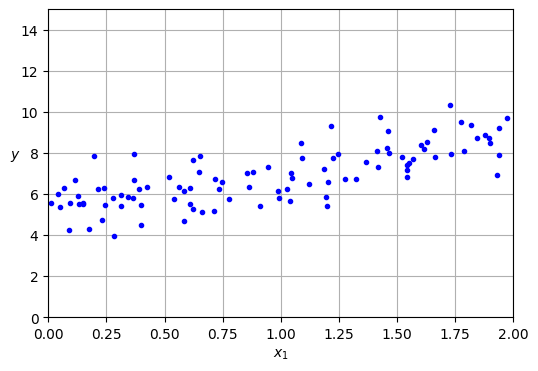

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show() # Random Linear Dataset

In [10]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # 각 sample에 x0=1 값을 부여
theta_test = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

- np.linalg.inv() : Inverse Matrix
- M1 @ M2 : np.matmul(M1, M2)로 대체 가능함. TF, Pytorch 등에서도 Numpy 이용한 @ 연산은 지원.

In [11]:
theta_test # Noise(rand) 때문에 (5,2) 값이 나오지 않는 모습

array([[5.21509616],
       [1.77011339]])

In [14]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_test
y_predict

array([[5.21509616],
       [8.75532293]])

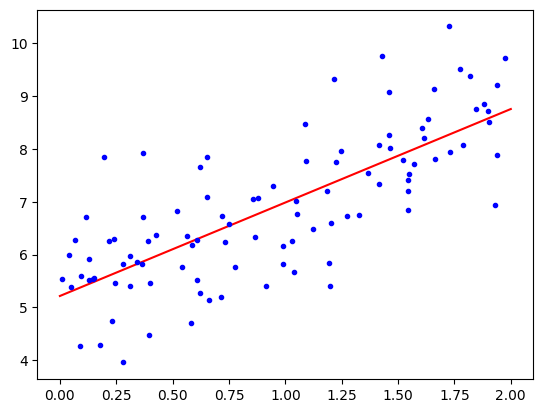

In [16]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, 'b.')
# X = 2 * np.random.rand(100, 1)
# y = 2*x + 5 + Noise

plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# coef(가중치), intercept(편향)를 확인
lin_reg.intercept_, lin_reg.coef_

(array([5.21509616]), array([[1.77011339]]))

np.linalg.inv() : 역행렬 - Matrix Multiplicatoin
- 행렬의 크기에 따라서 cost(계산) 증가하는 단점
- 해가 없는 경우 사용할 수 없다. (error)

np.linalg.lstsq() : 유사 역행렬 - SVD
- 해에 근접하는 근사값을 제공해주기 때문에, 정확한 해가 없는 경우에도 이용 가능함.

In [22]:
# np.linalg.lstsq() : SVD를 이용해 유사 역행렬을 구해줌
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[5.21509616],
       [1.77011339]])

# Gradient Descent
- N(feature), N(sample_size)이 큰 경우에 적합함.
- 즉, 이러한 요소들에 '민감하지' 않음
- goal : f(Cost)의 미분계수가 0에 근접하는 지점

Batch(배치) Gradient Descent

In [29]:
np.shape(X_b) # Noise가 추가된 X

(100, 2)

In [30]:
lr = 0.1 # Learning Rate
n_epochs = 1000 # epochs : 훈련을 얼마나 반복하는가
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs) :
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - lr * gradients #

In [31]:
theta

array([[5.21509616],
       [1.77011339]])

NameError: name 'save_fig' is not defined

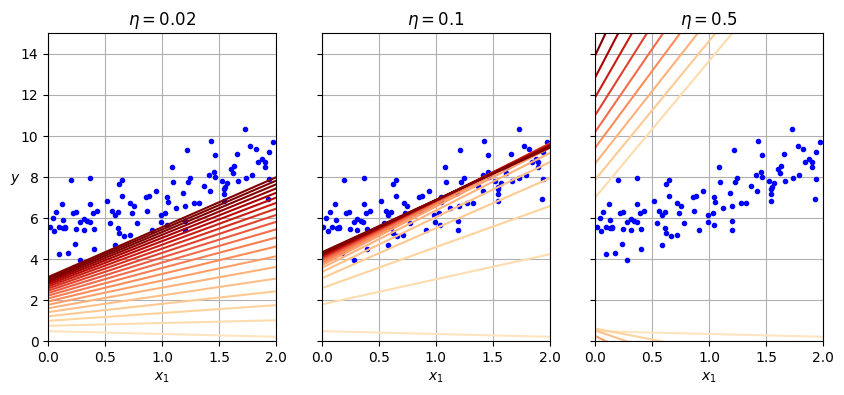

In [32]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

- Gradient(실선)은 Linear Model에 근접하도록 접차 접근(경사 하강)하는 중
- 학습률이 작다면(왼쪽) 접근하는데 너무 오래걸리고, 학습률이 크다면(오른쪽) Overfitting이 발생해 접근하지 못함을 볼 수 있음

Stochastic(확률적) Gradient Descent
- problem of batch : 모든 training_set을 이용해서 훈련이 느려짐.
- Stochastic은 매 단계마다 sample을 무작위로 선정함 -> 불안정성의 문제
- lr을 점차 작게 하는 Annealing(담금질) 기법을 통해 해결

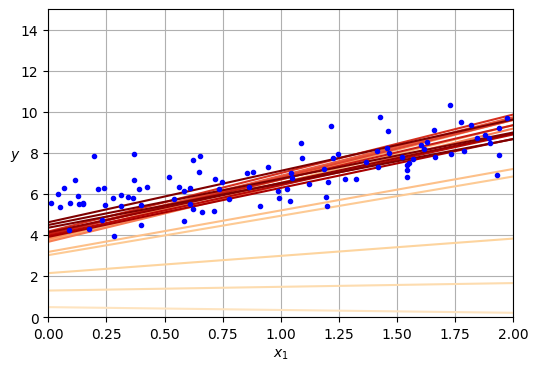

In [43]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        i = np.random.randint(m)
        xi, yi = X_b[i : i + 1], y[i : i + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

무작위로 선정했기 때문에 Gradient가 접근할수록 Dense 해지지 않는다.

Mini-batch Gradient Descent
- 전체/무작위 sample이 아니라, '임의의' mini-set에 대해 Gradient를 계산한다.
- Matrix 연산에 최적화된 GPU를 이용해 성능 향상 가능함.

# Polynomial Regression
- data가 선형적이지 않은 경우 사용

In [48]:
np.random.seed(42)
m = 100
X = 4 * np.random.rand(m, 1) + 5 # 4x+5
y = X**2 + 2*X + 1 + np.random.randn(m, 1) # y=(x+1)**2 + Noise

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [53]:
from sklearn.preprocessing import PolynomialFeatures

# 단항식을 다항식 꼴로 바꿈. degree를 통해서 차수 조정
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0] # 2차식으로 변환됨을 확인 가능함.

(array([6.49816048]), array([ 6.49816048, 42.22608956]))

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_ # 예측된 b, w2, w1 값

(array([8.59585238]), array([[-0.13321956,  1.14526593]]))

# Learning Curves : 학습 곡선
- 일반적으로 어떤 함수를 통해 data가 생성되었는지는 알 수 없다. : 어떤 다항 회귀를 할 지 모름
- 학습 곡선(model의 훈련 오차와 검증 오차를 iteration에 따라 나타낸 graph)를 통해서 model 평가
- 만약 partial_fit()이 불가한 경우, Size(training_set)을 증가시키며 여러 번 반복

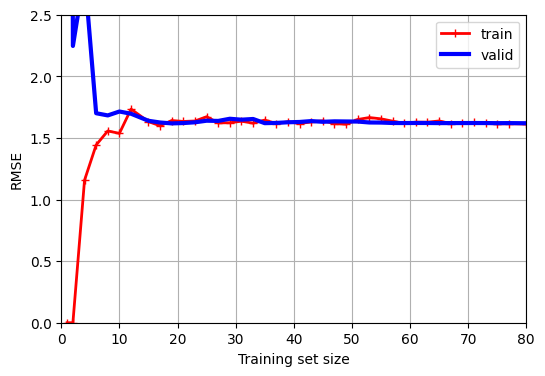

In [64]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE") # Root Mean Square Error
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show() # train, valid : 훈련, 검증

2차 다항 회귀 Train/Valid 결과 요약
1. Train
- size = 0 : 오차는 0일 수 밖에 없음
- size가 충분한 크지 않을 때 : Noise, non-linear 하므로 완벽한 Model training 불가능
2. Valid
- size가 충분히 크지 않다면 올바른 검증 불가능
- linear-model은 polynomial함을 반영하지 못하므로 오차가 있을 수밖에 없음

In [65]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

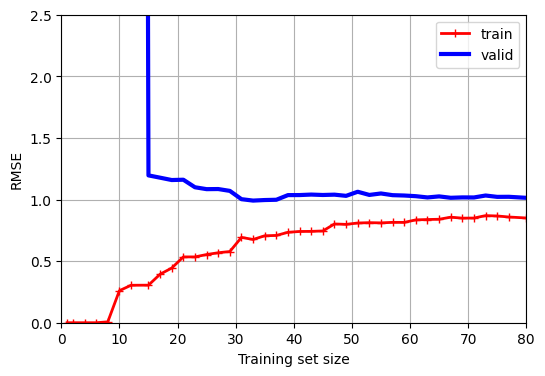

In [67]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

10차 다항 회귀 요약
- RMSE(오차)는 Train이 Valid보다 유의미하게 작다 : Overfitting(P)
- S) Valid sample size가 충분히 커져야 가까워짐.

# Regularized Linear Models
https://www.ibm.com/topics/ridge-regression#:~:text=Ridge%20regression%20is%20a%20statistical%20regularization%20technique.%20It%20corrects%20for%20overfitting%20on%20training%20data%20in%20machine%20learning%20models.
- P) weight가 1294처럼 큰 숫자면, Overfitting이 발생하기 쉽다.
- S) weight를 작게 제한함으로써, 이를 방지
- Ridge : weight 사이에 관계썽이 높은, Multicollinearity(다중공간성) 문제에 유용함
- Lasso : 중요하지 않은 weight를 0으로 만들어 변수를 자동으로 선택해줌 - 안정적 변수 선택 가능
- Elastic net(best) : Ridge, Lasso의 장점만 결합!

Early stopping(조기 종료) : min(Error) 발견 즉시 Training을 멈춤. -> best model 찾기

# Logistic Regression
- Return 1 If p>0.5 else 0
- Use Exp func

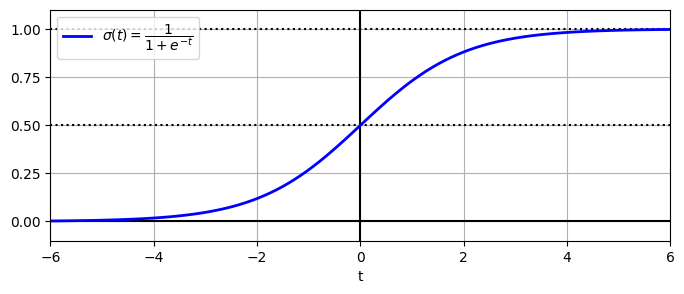

In [77]:
# Sigmoid function
# extra code – generates and saves Figure 4–21

t = np.linspace(-6, 6, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

In [78]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [79]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [80]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

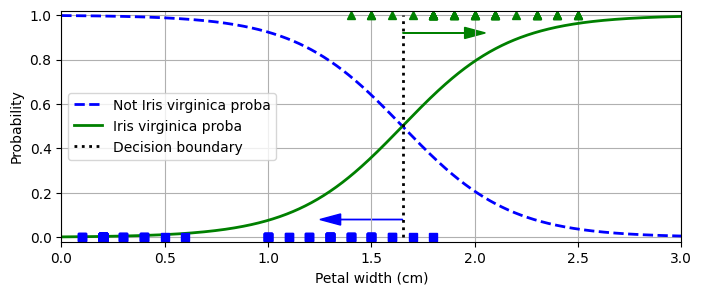

In [85]:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)

# 결정 경계는 p>=0.5인 경우
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, # arrow 추가
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0, # arrow 추가
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [86]:
decision_boundary # 결정 경계

1.6516516516516517

In [90]:
for i in range(5) :
  print(log_reg.predict([[1.3 + 0.1*i], [1.3 + 0.2*i]]))

[False False]
[False False]
[False  True]
[False  True]
[ True  True]


Softmax(Multinomial) Regression
- Binary classification이 아니라, Multi-class가 가능하도록 함.
- 각 class에 속할 p를 계산하고, 가장 높은 p를 갖는 class로 배정 (확률적 접근)

In [91]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

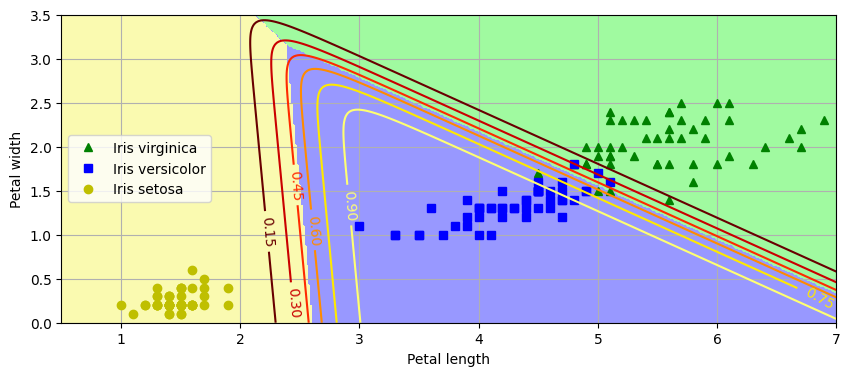

In [93]:
# extra code – this cell generates and saves Figure 4–25
# 3개의 class로 확률적 추정을 통해 분류한 모습

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()